Always remember: You have to work hard in Math and Code in order to be 
successful in this diploma and later in your career. <br>

• Update the code you performed in the homework for NOFDS2 lecture (use 
the GD algorithm to find the best values for theta0 and theta1) based on 
what you learned in practical session 1.  <br>

- [x] Modify this code to work for Batch, mini-batch, and stochastic GD. i.e. you 
should have three versions of GD algorithm, Batch, mini-batch, and 
stochastic. 
- [x]  For the batch GD try to make it momentum-based GD.  
- [x]  Try to implement NAG algorithm.  

 

import section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import math
%matplotlib inline
%alias_magic t timeit

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


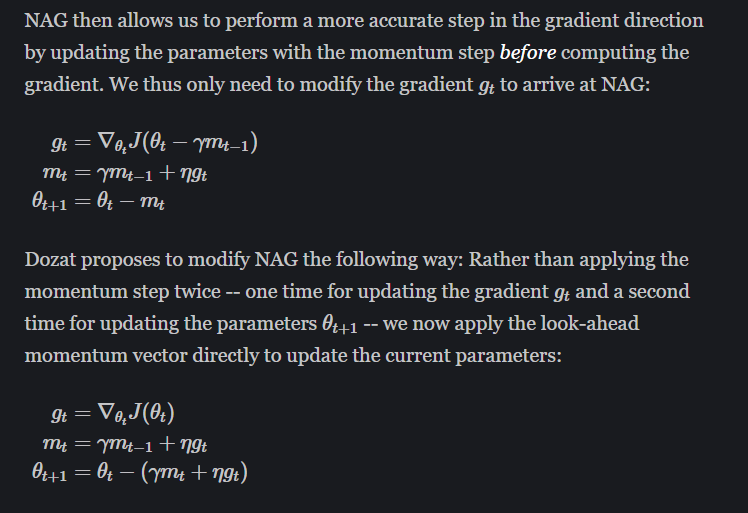

In [2]:
def gradient_descent(features , target
                     , number_of_iterations=100
                     , learning_rate = 0.05
                     , batch_size = None
                     , momentum_gama = 0, nag=False):
    thetas = []
    costs = []
    accrs = []
    features = np.hstack((np.ones((features.shape[0],1)),features))

    if batch_size == None:
        batch_size = features.shape[0]
    #split into batches
    No_of_batches = math.ceil(features.shape[0]/batch_size)
    full_features = np.array_split(features, No_of_batches)
    full_target = np.array_split(target, No_of_batches)

    #intialize the theta
    theta = np.zeros(features.shape[1]).reshape((features.shape[1],1))


    acc =0
    y_hat = full_features.copy()
    v = 0
    
    #stop to max iter
    iter_time = 0
    
    while not (iter_time+1 > number_of_iterations):
        
#     while not (iter_time+1 > number_of_iterations or acc > 99.999):
        for i in range(No_of_batches):
            
            #calc the M and start minizmize the cose
            m = full_target[i].shape[0]

            if nag == True:
                theta -= (momentum_gama* v)
                y_hat[i] = np.dot(full_features[i], theta)
                loss = y_hat[i] - full_target[i]
                theta -= (learning_rate *(1/m)* np.dot(full_features[i].T,(loss)))

            else:
                    
                y_hat[i] = np.dot(full_features[i], theta)

                #get the cost to draw later
                loss = y_hat[i] - full_target[i]

            v = momentum_gama*v + (learning_rate*(1/m)*np.dot(full_features[i].T,(loss)))
            theta -= v

#                 y_hat[i] = np.dot(full_features[i], theta)

            thetas.append(theta)

            cost = 1/(2*m) * np.dot((loss).T, (loss))
            costs.append(cost[0])
            
            if (batch_size >=2):
                y_hat[i] = np.dot(full_features[i], theta)
                accrs.append(round(skm.r2_score(full_target[i],y_hat[i]),6))
                

        if (batch_size <2):
            y_hat = np.dot(features, theta)
            accrs.append(round(skm.r2_score(target,y_hat),6))
        iter_time += 1

    return thetas,thetas,costs, accrs

### create some data 

In [3]:
number_of_data_points = 1000
a ,b = 1 , 1
x = (np.random.random(number_of_data_points)*10).reshape((number_of_data_points,1))
y = (a * x + b)

### BATCH TRIES

##### FULL BATCH

In [4]:
%%t
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05)

2.45 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05)
print(accrs[-1])

0.979599


##### MINI BATCH

In [6]:
%%t
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05
                     , batch_size = 256
                     , momentum_gama = 0, nag=False)


9.29 ms ± 46.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05
                     , batch_size = 256
                     , momentum_gama = 0, nag=False)
print(accrs[-1])

0.992365


In [8]:
%%t
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05
                     , batch_size = 32
                     , momentum_gama = 0, nag=False)


71 ms ± 463 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05
                     , batch_size = 32
                     , momentum_gama = 0, nag=False)
print(accrs[-1])

0.999991


In [10]:
%%t
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05
                     , batch_size = 64
                     , momentum_gama = 0, nag=False)


36.1 ms ± 687 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.05
                     , batch_size = 64
                     , momentum_gama = 0, nag=False)
print(accrs[-1])

0.99961


##### stochastic

In [12]:
%%t
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.001
                     , batch_size = 1
                     , momentum_gama =0, nag=False)

173 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.001
                     , batch_size = 1
                     , momentum_gama =0, nag=False)
print(accrs[-1])

0.999848


##### momentum-based GD.

In [14]:
%%t
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.001
                     , batch_size = None
                     , momentum_gama =.99, nag=False)

2.44 ms ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.001
                     , batch_size = None
                     , momentum_gama =.99, nag=False)
print(accrs[-1])

0.429329


In [18]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=10
                     , learning_rate = 0.001
                     , batch_size = None
                     , momentum_gama =.01, nag=False)
print(accrs[-1])

-1.655321


In [21]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=100
                     , learning_rate = 0.001
                     , batch_size = None
                     , momentum_gama =.99, nag=True)
print(accrs[-1])

0.993468


#### NAG algorithm.

In [16]:
%%t

thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=100
                     , learning_rate = 0.001                    
                     , batch_size = None
                     , momentum_gama = 0
                     , nag=True)


24.8 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
thetas,thetas,costs, accrs = gradient_descent(x , y, number_of_iterations=100
                     , learning_rate = 0.001                    
                     , batch_size = None
                     , momentum_gama = 0
                     , nag=True)
print(accrs[-1])

0.981214
